## Thesis Committee Meeting Plots

Used in slide deck [here](https://docs.google.com/presentation/d/1w2Y25LkIIh6a7A02s6ubECzorSQhWnYmIq38Pwv7qM4/edit#slide=id.p).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import datajoint as dj
import pandas as pd
import os
import seaborn as sns
import pandas as pd
from pathlib import Path
from datetime import date, timedelta

from io_utils import *
from performance_plots import * 

# settings
%load_ext autoreload
%autoreload 2
dj.blob.use_32bit_dims = True # necessary for pd.blob read
sns.set_context("talk")
 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df_all = fetch_latest_protocol_data()
antibias_working = pd.Timestamp(2022,8,5) # the day antibias was fixed
training_stabilizing = pd.Timestamp(2022,8,17)
df_antib =  df_all[(df_all['date'] > antibias_working)]
df_stable = df_all[(df_all['date'] > training_stabilizing)]

[2022-10-01 15:36:41,079][INFO]: Connecting jbreda@datajoint01.pni.princeton.edu:3306
[2022-10-01 15:36:42,090][INFO]: Connected jbreda@datajoint01.pni.princeton.edu:3306


fetched 69 sessions for R500 with latest date 2022-10-01
fetched 72 sessions for R501 with latest date 2022-10-01
fetched 75 sessions for R502 with latest date 2022-10-01
fetched 71 sessions for R503 with latest date 2022-10-01
fetched 72 sessions for R600 with latest date 2022-10-01


### Curriculum Plots

### Performance Plots

#### R600

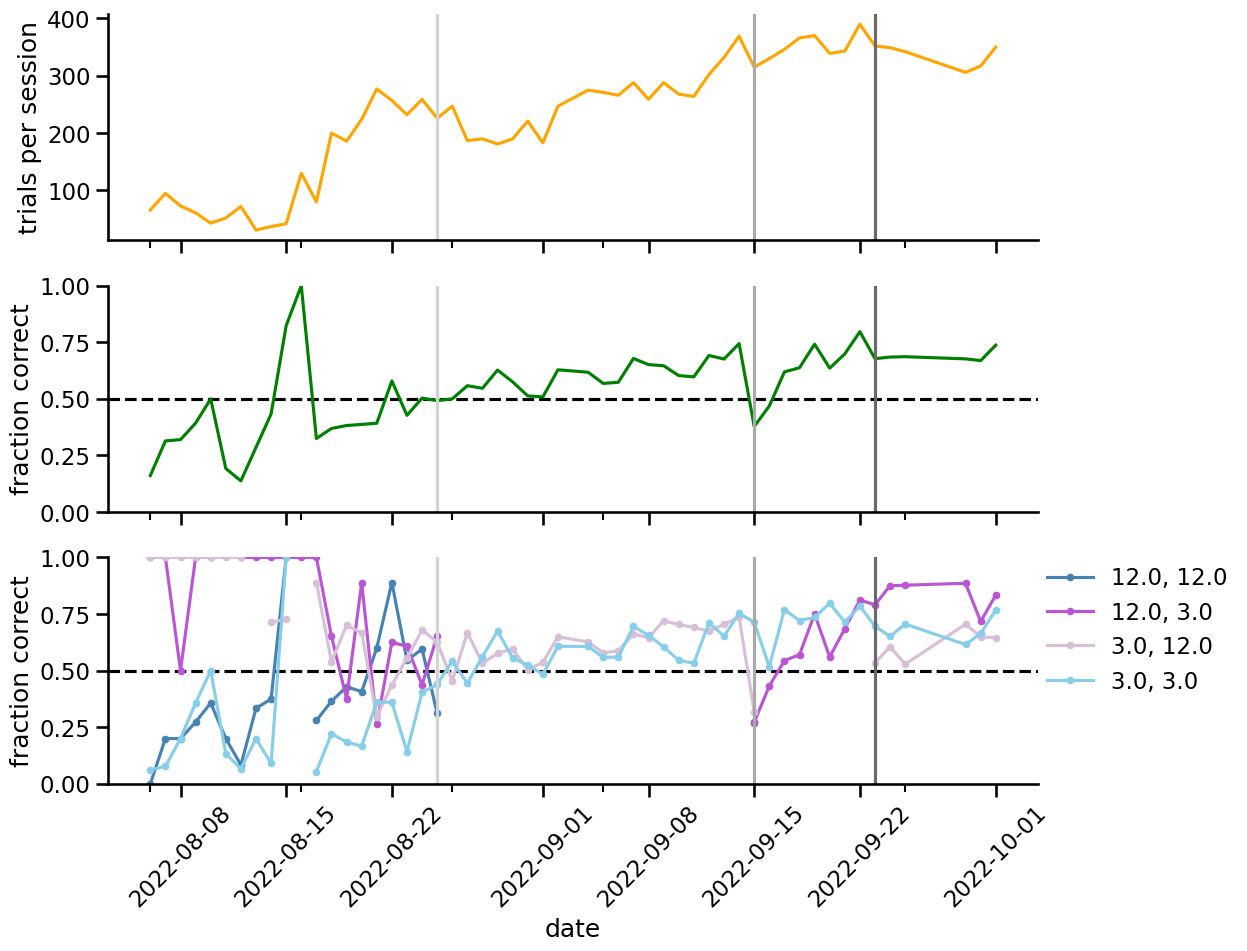

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
animal_id = 'R600'
df = df_antib.query("animal_id == 'R600'")

plot_trials(df, axs[0], title="", color="orange")
plot_hits(df, axs[1], title="", color="green")
plot_pair_performance(df, axs[2], animal_id)

for iax in range(len(axs)):
    axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-09-15'),color='darkgray')
    axs[iax].axvline(pd.Timestamp('2022-09-23'),color='dimgray')
    if iax > 0:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)

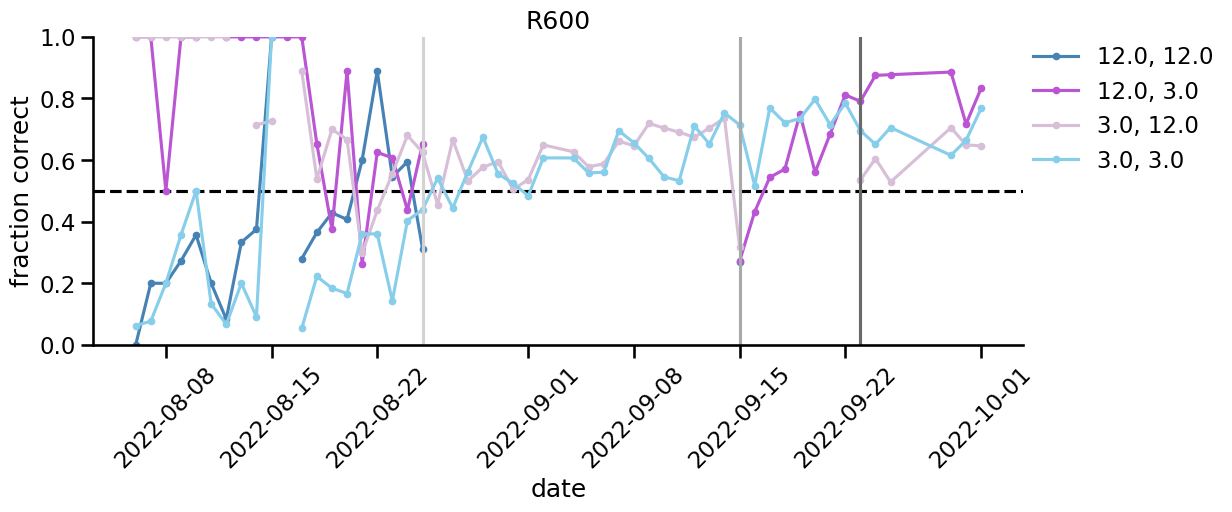

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharex=True)

plot_pair_performance(df, ax, animal_id)
ax.axhline(0.5, color='k', linestyle='--', zorder=1)

ax.axvline(pd.Timestamp('2022-08-25'),color='lightgray')
ax.axvline(pd.Timestamp('2022-09-15'),color='darkgray')
ax.axvline(pd.Timestamp('2022-09-23'),color='dimgray')

#### All Animals

##### Trials

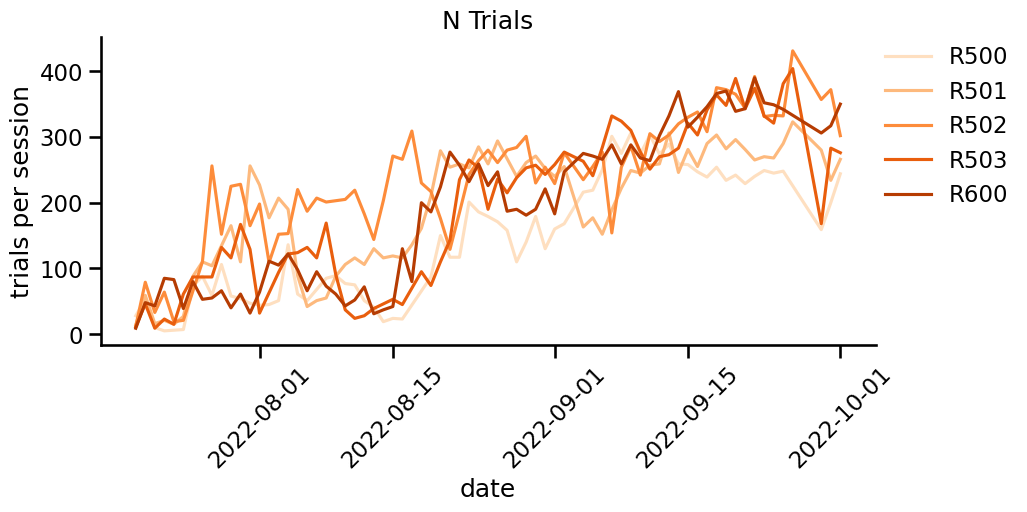

In [31]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
sns.lineplot(data = df_all.groupby(['animal_id', 'date']).max(),
                x ="date", y="trial", hue="animal_id", palette='Oranges', ax=ax)

_ = plt.xticks(rotation=45)
_ = ax.set(ylabel = "trials per session", title="N Trials")
sns.despine()

ax.legend(bbox_to_anchor=(1, 1), loc="upper left", borderaxespad=0, frameon=False)

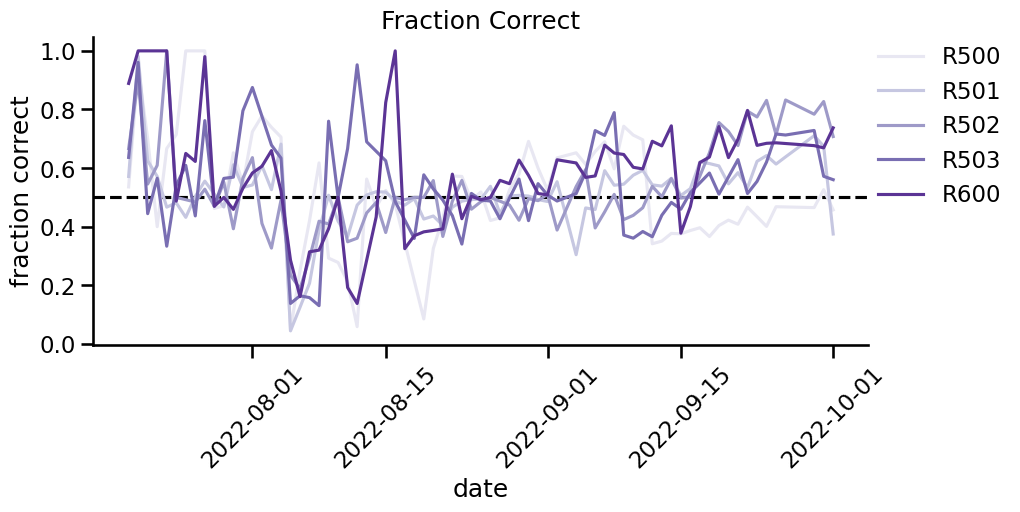

In [33]:
fig, ax = plt.subplots(1,1, figsize=(10,4))

sns.lineplot(data = df_all.groupby(['animal_id', 'date']).mean(),
                x ="date", y="hits", hue="animal_id", palette='Purples', ax=ax)

_ = plt.xticks(rotation=45)
_ = ax.set(ylabel = "fraction correct", title="Fraction Correct")
sns.despine()
ax.axhline(0.5, color='k', linestyle='--', zorder=1)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0,frameon=False)


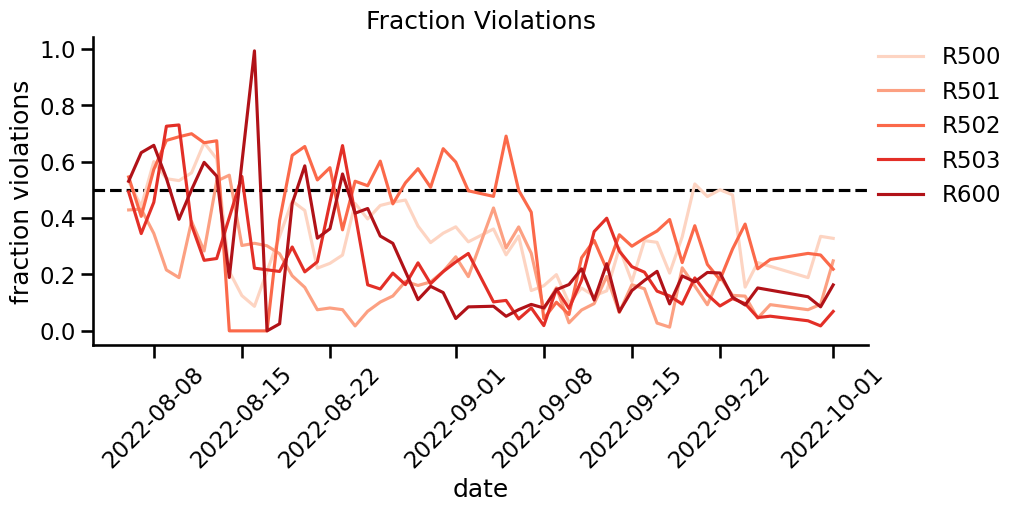

In [32]:
fig, ax = plt.subplots(1,1, figsize=(10,4))

sns.lineplot(data = df_antib.groupby(['animal_id', 'date']).mean(),
                x ="date", y="violations", hue="animal_id", palette='Reds', ax=ax)

_ = plt.xticks(rotation=45)
_ = ax.set(ylabel = "fraction violations", title="Fraction Violations")
sns.despine()
ax.axhline(0.5, color='k', linestyle='--', zorder=1)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0,frameon=False)

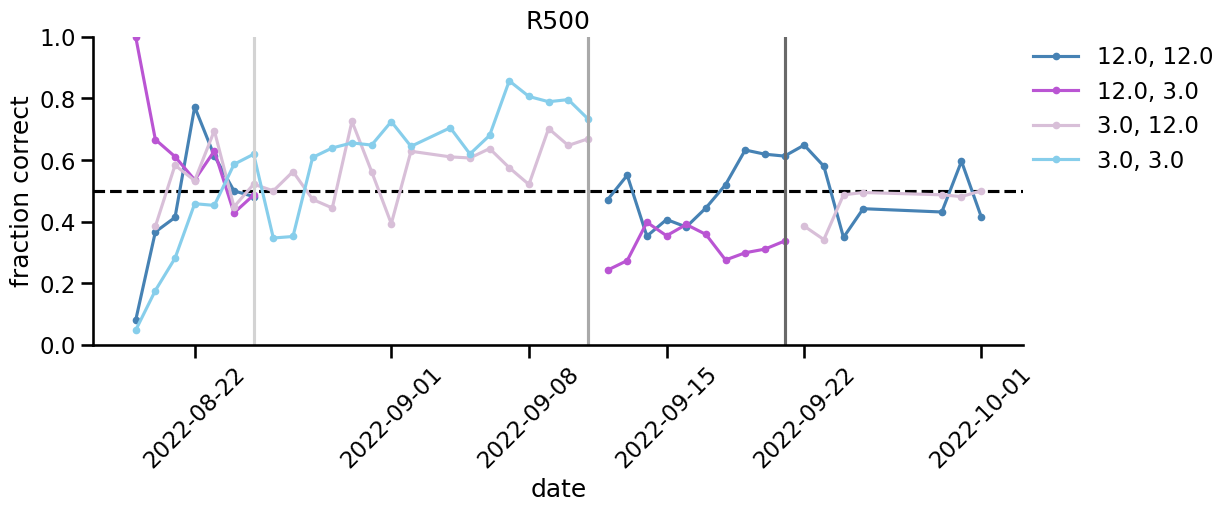

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharex=True)

animal_id = 'R500'
df = df_stable.query("animal_id == 'R500'")

plot_pair_performance(df, ax, animal_id)
ax.axhline(0.5, color='k', linestyle='--', zorder=1)

ax.axvline(pd.Timestamp('2022-08-25'),color='lightgray')
ax.axvline(pd.Timestamp('2022-09-11'),color='darkgray')
ax.axvline(pd.Timestamp('2022-09-21'),color='dimgray')

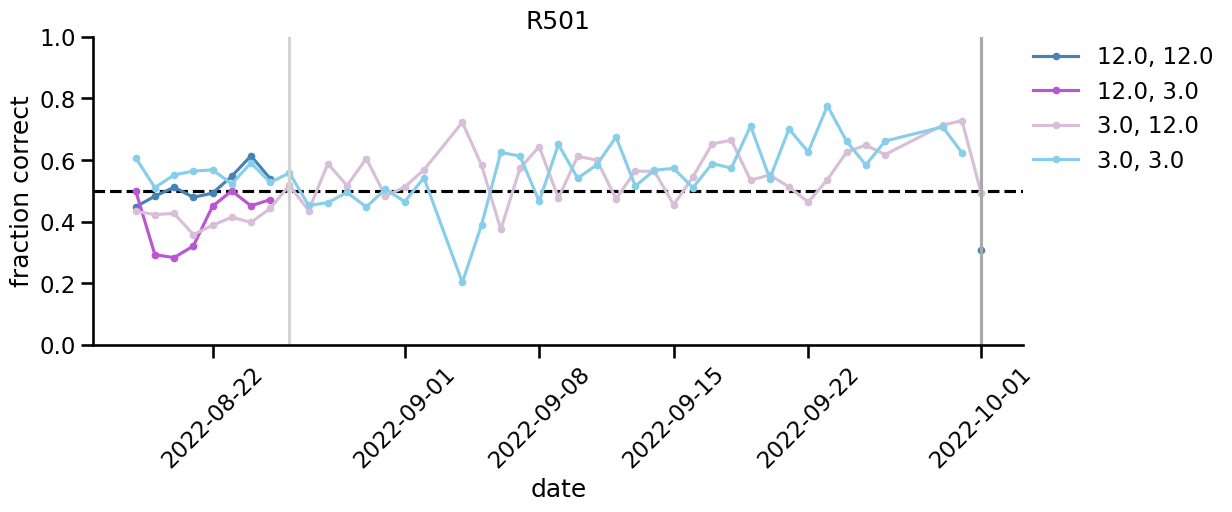

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharex=True)

animal_id = 'R501'
df = df_stable.query("animal_id == 'R501'")

plot_pair_performance(df, ax, animal_id)
ax.axhline(0.5, color='k', linestyle='--', zorder=1)

ax.axvline(pd.Timestamp('2022-08-26'),color='lightgray')
ax.axvline(pd.Timestamp('2022-10-01'),color='darkgray')

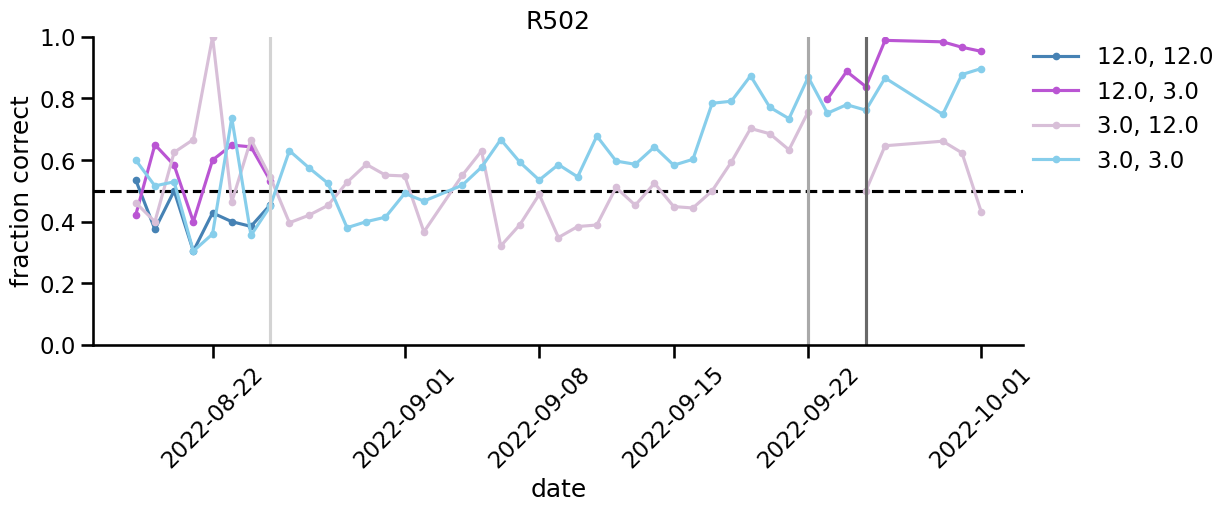

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharex=True)

animal_id = 'R502'
df = df_stable.query("animal_id == 'R502'")

plot_pair_performance(df, ax, animal_id)
ax.axhline(0.5, color='k', linestyle='--', zorder=1)

ax.axvline(pd.Timestamp('2022-08-25'),color='lightgray')
ax.axvline(pd.Timestamp('2022-09-22'),color='darkgray')
ax.axvline(pd.Timestamp('2022-09-25'),color='dimgray')

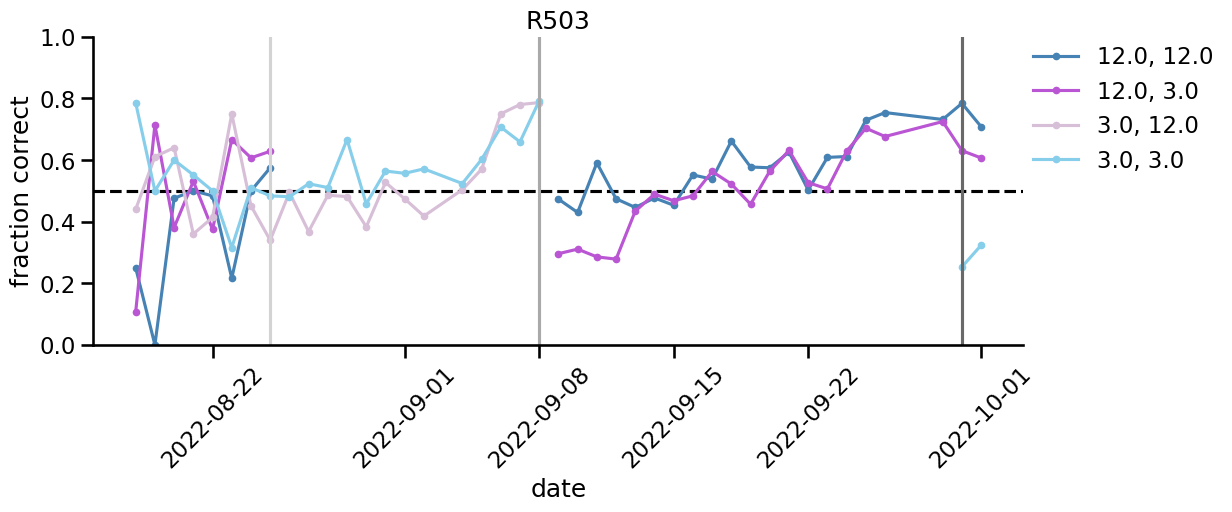

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharex=True)

animal_id = 'R503'
df = df_stable.query("animal_id == 'R503'")

plot_pair_performance(df, ax, animal_id)
ax.axhline(0.5, color='k', linestyle='--', zorder=1)

ax.axvline(pd.Timestamp('2022-08-25'),color='lightgray')
ax.axvline(pd.Timestamp('2022-09-08'),color='darkgray')
ax.axvline(pd.Timestamp('2022-09-30'),color='dimgray')